In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dmg/clustering_data.csv')
print(dataset.head())
print(dataset.columns)
plt.style.use('seaborn')

      id  ... Horizontal_Distance_To_Fire_Points
0  11000  ...                                low
1  11001  ...                                low
2  11002  ...                                low
3  11003  ...                                low
4  11004  ...                                low

[5 rows x 11 columns]
Index(['id', 'Elevation', 'Aspect', 'Slope', 'Wilderness', 'Soil_Type',
       'Hillshade_9am', 'Hillshade_noon', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Fire_Points'],
      dtype='object')


In [ ]:
print(dataset['Aspect'])

0         aspect_high
1       aspect_medium
2         aspect_high
3          aspect_low
4         aspect_high
            ...      
4115      aspect_high
4116    aspect_medium
4117      aspect_high
4118      aspect_high
4119      aspect_high
Name: Aspect, Length: 4120, dtype: object


In [ ]:
# encoding the data to numeric values in each column
#encoding the above columns
dd=dataset.copy()
print(dd.head())
dd['Elevation']=dd['Elevation'].astype('category')
dd['Elevation']=dd['Elevation'].cat.codes

dd['Aspect']=dd['Aspect'].astype('category')
dd['Aspect']=dd['Aspect'].cat.codes

dd['Slope']=dd['Slope'].astype('category')
dd['Slope']=dd['Slope'].cat.codes

dd['Wilderness']=dd['Wilderness'].astype('category')
dd['Wilderness']=dd['Wilderness'].cat.codes

dd['Soil_Type']=dd['Soil_Type'].astype('category')
dd['Soil_Type']=dd['Soil_Type'].cat.codes

dd['Hillshade_9am']=dd['Hillshade_9am'].astype('category')
dd['Hillshade_9am']=dd['Hillshade_9am'].cat.codes

dd['Hillshade_noon']=dd['Hillshade_noon'].astype('category')
dd['Hillshade_noon']=dd['Hillshade_noon'].cat.codes

dd['Horizontal_Distance_To_Fire_Points']=dd['Horizontal_Distance_To_Fire_Points'].astype('category')
dd['Horizontal_Distance_To_Fire_Points']=dd['Horizontal_Distance_To_Fire_Points'].cat.codes
print(dd.info())

      id  ... Horizontal_Distance_To_Fire_Points
0  11000  ...                                low
1  11001  ...                                low
2  11002  ...                                low
3  11003  ...                                low
4  11004  ...                                low

[5 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   id                                  4120 non-null   int64
 1   Elevation                           4120 non-null   int8 
 2   Aspect                              4120 non-null   int8 
 3   Slope                               4120 non-null   int8 
 4   Wilderness                          4120 non-null   int8 
 5   Soil_Type                           4120 non-null   int8 
 6   Hillshade_9am                       4120 non-null   int8 
 7   Hill

In [ ]:
print(dd['Aspect'])

0       0
1       2
2       0
3       1
4       0
       ..
4115    0
4116    2
4117    0
4118    0
4119    0
Name: Aspect, Length: 4120, dtype: int8


# **Skewness of Data**

In [ ]:
dd.skew()

id                                    0.000000
Elevation                            -0.087723
Aspect                                0.043629
Slope                                 0.040999
Wilderness                            0.676599
Soil_Type                             0.346409
Hillshade_9am                        -0.715880
Hillshade_noon                       -0.684693
Horizontal_Distance_To_Hydrology     -0.235249
Vertical_Distance_To_Hydrology        0.137089
Horizontal_Distance_To_Fire_Points   -0.654381
dtype: float64

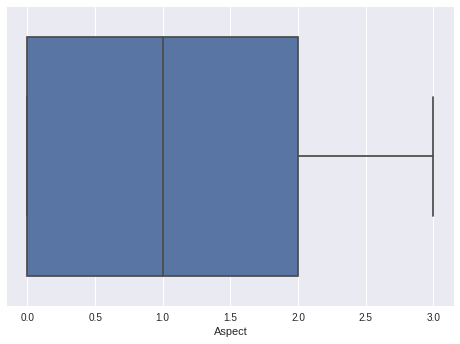

In [ ]:
ax = sns.boxplot(x=dd['Aspect'])

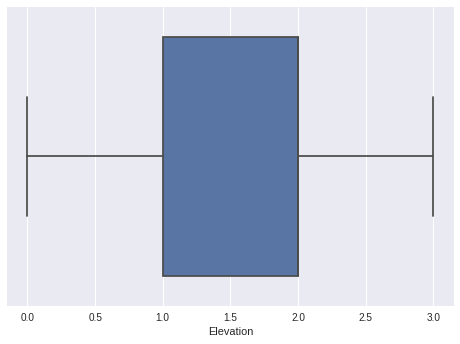

In [ ]:
ax = sns.boxplot(x=dd['Elevation'])

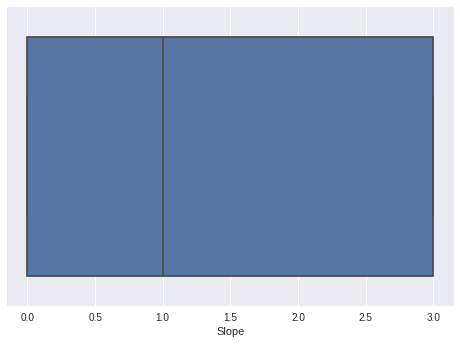

In [ ]:
ax = sns.boxplot(x=dd['Slope'])

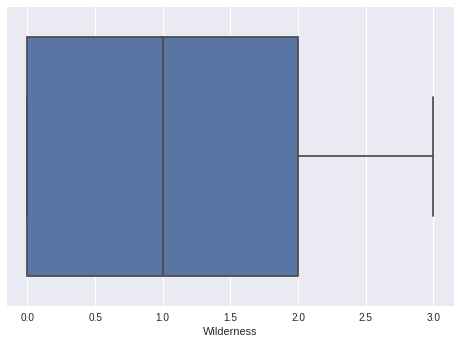

In [ ]:
ax = sns.boxplot(x=dd['Wilderness'])

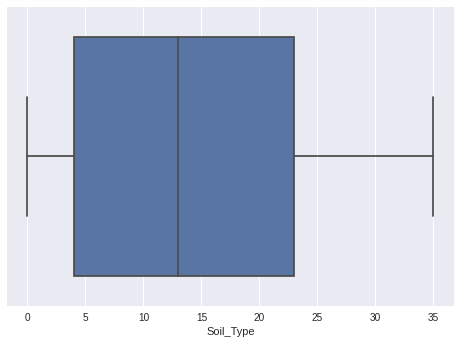

In [ ]:
ax = sns.boxplot(x=dd['Soil_Type'])

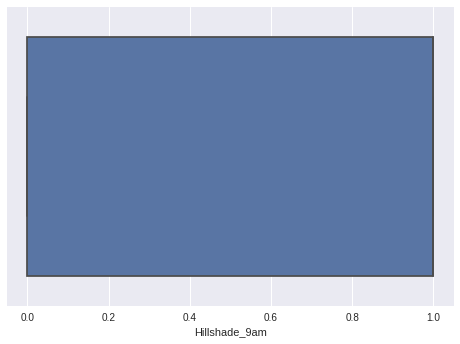

In [ ]:
ax = sns.boxplot(x=dd['Hillshade_9am'])

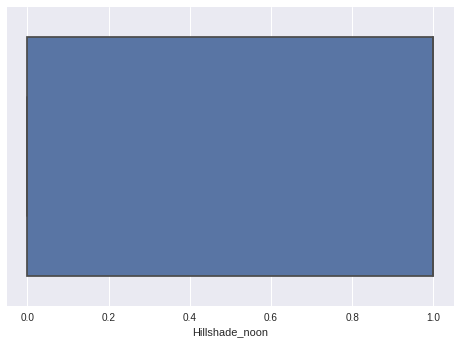

In [ ]:
ax = sns.boxplot(x=dd['Hillshade_noon'])

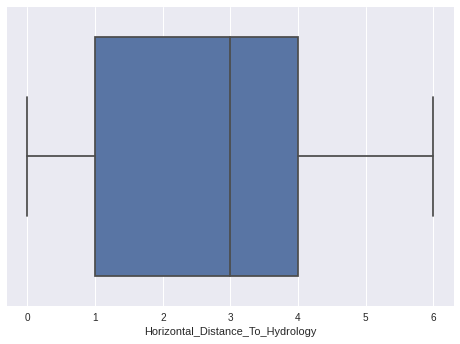

In [ ]:
ax = sns.boxplot(x=dd['Horizontal_Distance_To_Hydrology'])

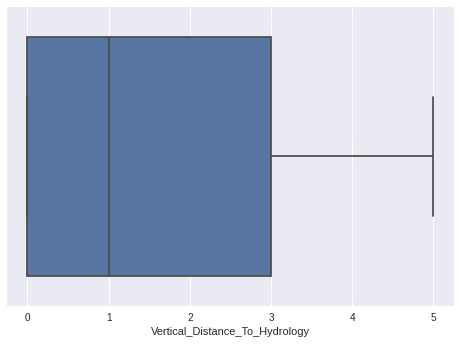

In [ ]:
ax = sns.boxplot(x=dd['Vertical_Distance_To_Hydrology'])

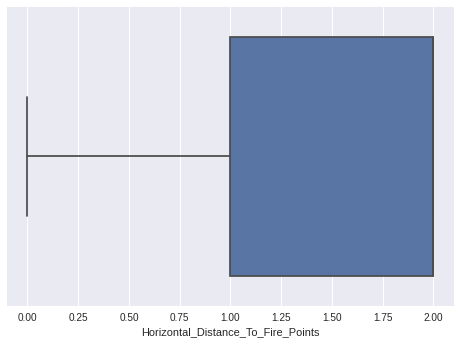

In [ ]:
ax = sns.boxplot(x=dd['Horizontal_Distance_To_Fire_Points'])

# **Scaling the dataset here**

In [ ]:
print(dd.head())
#Dropping the id column
data=dd.drop('id',axis=1)
print(data.head())
print(data.columns)
print(len(data.columns))
# first scaling the features of the dataset
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
# fitting 
sc.fit(data) 
scaled_data = sc.transform(data)
print(scaled_data)
print(scaled_data.shape)


      id  ...  Horizontal_Distance_To_Fire_Points
0  11000  ...                                   1
1  11001  ...                                   1
2  11002  ...                                   1
3  11003  ...                                   1
4  11004  ...                                   1

[5 rows x 11 columns]
   Elevation  ...  Horizontal_Distance_To_Fire_Points
0          2  ...                                   1
1          2  ...                                   1
2          2  ...                                   1
3          2  ...                                   1
4          2  ...                                   1

[5 rows x 10 columns]
Index(['Elevation', 'Aspect', 'Slope', 'Wilderness', 'Soil_Type',
       'Hillshade_9am', 'Hillshade_noon', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Fire_Points'],
      dtype='object')
10
[[ 0.43864245 -1.31940211 -0.4302152  ... -1.4837387  -0.51821989
  -0.64947218]


**Here using the PCA , we are just reducing the dimensionality of the dataset from 10 columns to the 2 columns. With two columns, we shall be able to visualize the dataset properly in the form of clusters on a graph**.

# **PCA**

In [ ]:
# Importing PCA 
from sklearn.decomposition import PCA 
  
# Let's say, components = 2 
pca_d= PCA(n_components = 2) 
pca_d.fit(scaled_data) 
pca_data = pca_d.transform(scaled_data) 
  
print(pca_data.shape)
print(pca_data)

(4120, 2)
[[-1.63612255  1.24771666]
 [-0.39738811 -0.38239766]
 [-0.94622539  2.07113607]
 ...
 [ 1.80246661  0.26371705]
 [ 1.57735556  1.87345313]
 [ 1.20289066  2.1876872 ]]


# **TSNE**

In [ ]:
from sklearn.manifold import TSNE
# Let's say, components = 2 
tsne = TSNE(n_components = 2) 
x_tsne = tsne.fit_transform(scaled_data) 
  
print(x_tsne.shape)
print(x_tsne)

(4120, 2)
[[-64.64826    -4.7081857]
 [ 15.751501   61.60951  ]
 [-70.66779     5.5182633]
 ...
 [ 34.020134   60.838882 ]
 [-54.385807   39.43994  ]
 [-57.644886   39.659058 ]]


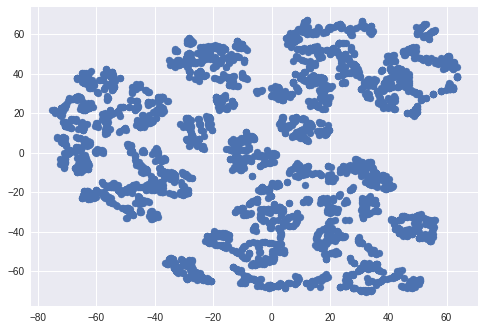

In [ ]:
plt.scatter(x_tsne[:,0],x_tsne[:,1])
plt.show()

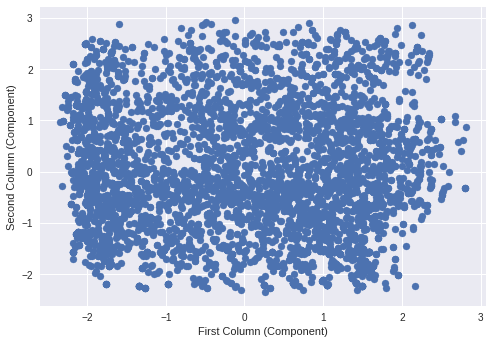

In [ ]:
plt.scatter(pca_data[:,0],pca_data[:,1])
plt.xlabel("First Column (Component)")
plt.ylabel("Second Column (Component)")
plt.show()

# **KMEANS ++**

**Using PCA**

4120
<class 'numpy.ndarray'>
[0 1 2 3 4]
          a         b
0 -1.636123  1.247717
1 -0.397388 -0.382398
2 -0.946225  2.071136
3 -0.842089 -0.872252
4  0.363407  2.492336
          a         b  y
0 -1.636123  1.247717  0
1 -0.397388 -0.382398  2
2 -0.946225  2.071136  0
3 -0.842089 -0.872252  2
4  0.363407  2.492336  4
          a         b
0 -1.636123  1.247717
1 -0.397388 -0.382398
2 -0.946225  2.071136
3 -0.842089 -0.872252
4  0.363407  2.492336
   y
0  0
1  2
2  0
3  2
4  4
695
4120
Coordinates of Centroids in the graph : 
[[-1.3119931   1.23988719]
 [ 1.30777401  0.13258923]
 [-1.31699771 -0.73887984]
 [ 0.80602627 -1.31662965]
 [ 0.88051848  1.79642071]]


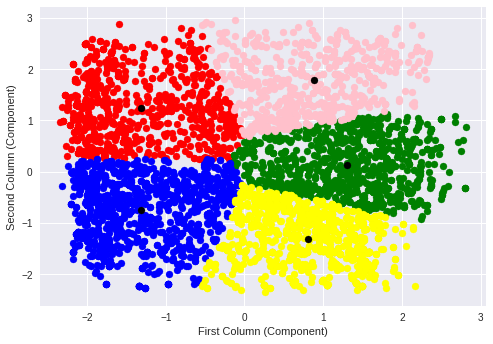

In [ ]:
from sklearn.cluster import KMeans
# Fit K-means with Scikit
# kmeans = KMeans(init='k-means++', n_clusters=5, n_init=2,max_iter=2)
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(pca_data)
# predicting the clusters
p=kmeans.predict(pca_data)
print(len(p))
print(type(p))
print(np.unique(p))
data1=pd.DataFrame(data=pca_data,columns=['a','b'])
print(data1.head())
data1['y']=p
print(data1.head())
X=data1.loc[:,['a','b']]
y=data1.loc[:,['y']]
print(X.head())
print(y.head())
# plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y)
# plt.show()
x1=data1[data1['y']==0]
x2=data1[data1['y']==1]
x3=data1[data1['y']==2]
x4=data1[data1['y']==3]
x5=data1[data1['y']==4]
# print(x1.head())
print(x1.shape[0])
print(x1.shape[0]+x2.shape[0]+x3.shape[0]+x4.shape[0]+x5.shape[0])
cPoints1=kmeans.cluster_centers_
print("Coordinates of Centroids in the graph : ")
print(cPoints1)
plt.scatter(x1.iloc[:,0],x1.iloc[:,1],color='red')
plt.scatter(x2.iloc[:,0],x2.iloc[:,1],color='green')
plt.scatter(x3.iloc[:,0],x3.iloc[:,1],color='blue')
plt.scatter(x4.iloc[:,0],x4.iloc[:,1],color='yellow')
plt.scatter(x5.iloc[:,0],x5.iloc[:,1],color='pink')
plt.scatter(cPoints1[:,0],cPoints1[:,1],color='black')

plt.xlabel("First Column (Component)")
plt.ylabel("Second Column (Component)")
plt.show()

**Using TSNE**

4120
<class 'numpy.ndarray'>
[0 1 2 3 4]
           a          b
0 -64.648262  -4.708186
1  15.751501  61.609509
2 -70.667793   5.518263
3  36.758583 -65.546883
4 -62.411343  32.613632
           a          b  y
0 -64.648262  -4.708186  1
1  15.751501  61.609509  3
2 -70.667793   5.518263  1
3  36.758583 -65.546883  0
4 -62.411343  32.613632  1
           a          b
0 -64.648262  -4.708186
1  15.751501  61.609509
2 -70.667793   5.518263
3  36.758583 -65.546883
4 -62.411343  32.613632
   y
0  1
1  3
2  1
3  0
4  1
4120
Coordinates of Centroids in the graph : 
[[ 32.030804  -37.595715 ]
 [-53.563873    5.9050407]
 [ -9.321764   22.627434 ]
 [ 33.768646   44.300552 ]
 [-10.433865  -45.876915 ]]


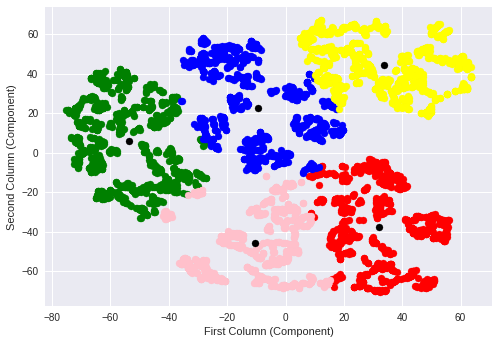

In [ ]:
from sklearn.cluster import KMeans
# Fit K-means with Scikit
# kmeans = KMeans(init='k-means++', n_clusters=5, n_init=2,max_iter=2)
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(x_tsne)
# predicting the clusters
p=kmeans.predict(x_tsne)
print(len(p))
print(type(p))
print(np.unique(p))
data1=pd.DataFrame(data=x_tsne,columns=['a','b'])
print(data1.head())
data1['y']=p
print(data1.head())
X=data1.loc[:,['a','b']]
y=data1.loc[:,['y']]
print(X.head())
print(y.head())
# plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y)
# plt.show()
x1=data1[data1['y']==0]
x2=data1[data1['y']==1]
x3=data1[data1['y']==2]
x4=data1[data1['y']==3]
x5=data1[data1['y']==4]
# print(x1.head())
print(x1.shape[0]+x2.shape[0]+x3.shape[0]+x4.shape[0]+x5.shape[0])
cPoints1=kmeans.cluster_centers_
print("Coordinates of Centroids in the graph : ")
print(cPoints1)
plt.scatter(x1.iloc[:,0],x1.iloc[:,1],color='red')
plt.scatter(x2.iloc[:,0],x2.iloc[:,1],color='green')
plt.scatter(x3.iloc[:,0],x3.iloc[:,1],color='blue')
plt.scatter(x4.iloc[:,0],x4.iloc[:,1],color='yellow')
plt.scatter(x5.iloc[:,0],x5.iloc[:,1],color='pink')
plt.scatter(cPoints1[:,0],cPoints1[:,1],color='black')
plt.xlabel("First Column (Component)")
plt.ylabel("Second Column (Component)")
plt.show()

# **Determining the optimal value of k for KMEANS++**
**We are using the elbow method for this analysis**

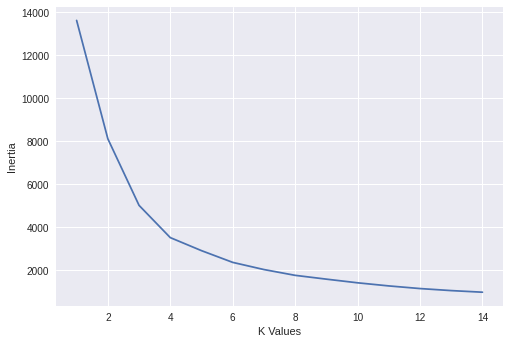

In [ ]:
error={}
for i in range(1,15):
  kmeans = KMeans(init='k-means++', n_clusters=i, n_init=10)
  kmeans.fit(pca_data)
  # getting the squared error of the clustered points
  sqError=kmeans.inertia_
  error[i]=sqError
plt.plot(list(error.keys()),list(error.values()))
plt.xlabel("K Values")
plt.ylabel("Inertia")
plt.show()

**The elbow is at the point 3 , hence 3 is the optimum value of k for KMeans++ clustering.**


# **Determining the optimal value of k (for kmeans++) using Silhouette Score**

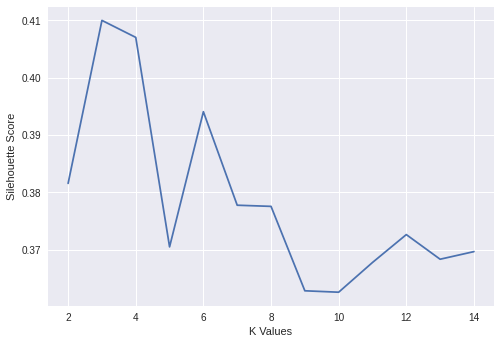

Maximum silhouette score is  0.41001516288025025  for  3


In [ ]:
from sklearn.metrics import silhouette_score 
silScores={}
maxSil=-1
ans=(-1,-1)
for i in range(2,15):
  kmeans = KMeans(init='k-means++', n_clusters=i, n_init=10)
  kmeans.fit(pca_data)
  cluster_labels=kmeans.predict(pca_data)
  # getting the average of silehouette score of all points
  # pca_data_arr=np.array(pca_data).reshape(-1,1)
  silAvg=silhouette_score(pca_data, cluster_labels) 
  silScores[i]=silAvg
  if maxSil<silAvg :
    maxSil=silAvg
    ans=(i,maxSil)
plt.plot(list(silScores.keys()),list(silScores.values()))
plt.xlabel("K Values")
plt.ylabel("Silehouette Score")
plt.show()
print("Maximum silhouette score is ",ans[1], " for ",ans[0])

**The value of k that we get from silhouette analysis is same as that we get from elbow method i.e. k=3.**

# **KMEANS++ Clustering using optimal value of k = 3**

Coordinates of Centroids in the graph : 
[[ 0.9315802  -0.93518981]
 [-1.42099014 -0.08881269]
 [ 0.81449043  1.40875705]]


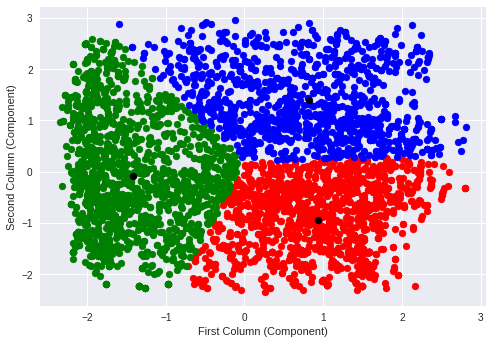

In [ ]:
from sklearn.cluster import KMeans
# Fit K-means with Scikit
# kmeans = KMeans(init='k-means++', n_clusters=5, n_init=2,max_iter=2)
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(pca_data)
# predicting the clusters
p=kmeans.predict(pca_data)
data1=pd.DataFrame(data=pca_data,columns=['a','b'])

data1['y']=p

X=data1.loc[:,['a','b']]
y=data1.loc[:,['y']]

x1=data1[data1['y']==0]
x2=data1[data1['y']==1]
x3=data1[data1['y']==2]

cPoints1=kmeans.cluster_centers_
print("Coordinates of Centroids in the graph : ")
print(cPoints1)
plt.scatter(x1.iloc[:,0],x1.iloc[:,1],color='red')
plt.scatter(x2.iloc[:,0],x2.iloc[:,1],color='green')
plt.scatter(x3.iloc[:,0],x3.iloc[:,1],color='blue')
plt.scatter(cPoints1[:,0],cPoints1[:,1],color='black')
plt.xlabel("First Column (Component)")
plt.ylabel("Second Column (Component)")
plt.show()

# **KMEANS**

4120
<class 'numpy.ndarray'>
[0 1 2 3 4]
          a         b
0 -1.636123  1.247717
1 -0.397388 -0.382398
2 -0.946225  2.071136
3 -0.842089 -0.872252
4  0.363407  2.492336
          a         b  y
0 -1.636123  1.247717  3
1 -0.397388 -0.382398  2
2 -0.946225  2.071136  3
3 -0.842089 -0.872252  1
4  0.363407  2.492336  3
             a         b  y
0    -1.636123  1.247717  3
1    -0.397388 -0.382398  2
2    -0.946225  2.071136  3
3    -0.842089 -0.872252  1
4     0.363407  2.492336  3
...        ...       ... ..
4115 -0.051085  1.974206  3
4116  2.148039  0.035527  4
4117  1.802467  0.263717  4
4118  1.577356  1.873453  4
4119  1.202891  2.187687  4

[4120 rows x 3 columns]
          a         b
0 -1.636123  1.247717
1 -0.397388 -0.382398
2 -0.946225  2.071136
3 -0.842089 -0.872252
4  0.363407  2.492336
   y
0  3
1  2
2  3
3  1
4  3
4120
Coordinates of Centroids in the graph : 
[[-1.83740625  0.24504412]
 [ 0.20979523 -1.07181541]
 [-0.12524659  0.32260903]
 [-0.69200247  1.43504943]


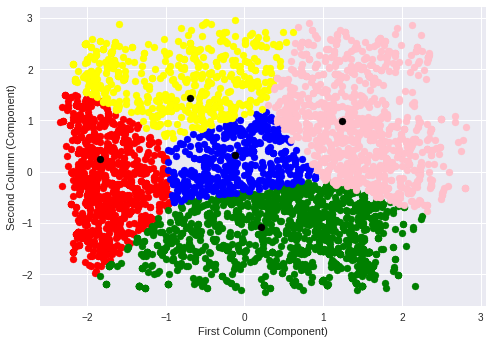

In [ ]:
# from sklearn.cluster import KMeans
# Fit K-means with Scikit
kmeans = KMeans(init='random', n_clusters=5, n_init=2,max_iter=1)
kmeans.fit(pca_data)
# predicting the clusters
p=kmeans.predict(pca_data)
print(len(p))
# sacing the predicted results
# pd.DataFrame(p).to_csv('file1.csv', index=False) 
# dp = pd.read_csv('/content/file1.csv')
# print(dp)
print(type(p))
print(np.unique(p))
data1=pd.DataFrame(data=pca_data,columns=['a','b'])
print(data1.head())
data1['y']=p
print(data1.head())
data1.to_csv('result.csv', index=False) 
dp = pd.read_csv('/content/result.csv')
print(dp)

X=data1.loc[:,['a','b']]
y=data1.loc[:,['y']]
print(X.head())
print(y.head())

# plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y)
# plt.show()
x1=data1[data1['y']==0]
x2=data1[data1['y']==1]
x3=data1[data1['y']==2]
x4=data1[data1['y']==3]
x5=data1[data1['y']==4]
# print(x1.head())
print(x1.shape[0]+x2.shape[0]+x3.shape[0]+x4.shape[0]+x5.shape[0])

cPoints=kmeans.cluster_centers_
print("Coordinates of Centroids in the graph : ")
print(cPoints)
plt.scatter(x1.iloc[:,0],x1.iloc[:,1],color='red')
plt.scatter(x2.iloc[:,0],x2.iloc[:,1],color='green')
plt.scatter(x3.iloc[:,0],x3.iloc[:,1],color='blue')
plt.scatter(x4.iloc[:,0],x4.iloc[:,1],color='yellow')
plt.scatter(x5.iloc[:,0],x5.iloc[:,1],color='pink')
plt.scatter(cPoints[:,0],cPoints[:,1],color='black')
plt.xlabel("First Column (Component)")
plt.ylabel("Second Column (Component)")
plt.show()

**TSNE and K Means**

4120
<class 'numpy.ndarray'>
[0 1 2 3 4]
           a          b
0 -64.648262  -4.708186
1  15.751501  61.609509
2 -70.667793   5.518263
3  36.758583 -65.546883
4 -62.411343  32.613632
           a          b  y
0 -64.648262  -4.708186  2
1  15.751501  61.609509  4
2 -70.667793   5.518263  2
3  36.758583 -65.546883  0
4 -62.411343  32.613632  2
           a          b
0 -64.648262  -4.708186
1  15.751501  61.609509
2 -70.667793   5.518263
3  36.758583 -65.546883
4 -62.411343  32.613632
   y
0  2
1  4
2  2
3  0
4  2
4120
Coordinates of Centroids in the graph : 
[[ 29.290804  -51.361526 ]
 [ 17.212873   27.904533 ]
 [-51.845913    4.3276515]
 [ -0.4668132 -23.600275 ]
 [ 19.026125   51.50563  ]]


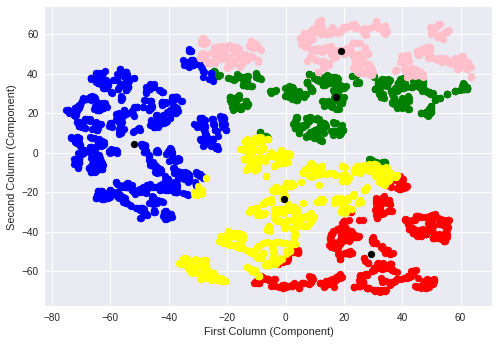

In [ ]:
# from sklearn.cluster import KMeans
# Fit K-means with Scikit
kmeans = KMeans(init='random', n_clusters=5, n_init=2,max_iter=1)
kmeans.fit(x_tsne)
# predicting the clusters
p=kmeans.predict(x_tsne)
print(len(p))

print(type(p))
print(np.unique(p))
data1=pd.DataFrame(data=x_tsne,columns=['a','b'])
print(data1.head())
data1['y']=p
print(data1.head())

X=data1.loc[:,['a','b']]
y=data1.loc[:,['y']]
print(X.head())
print(y.head())

# plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y)
# plt.show()
x1=data1[data1['y']==0]
x2=data1[data1['y']==1]
x3=data1[data1['y']==2]
x4=data1[data1['y']==3]
x5=data1[data1['y']==4]
# print(x1.head())
print(x1.shape[0]+x2.shape[0]+x3.shape[0]+x4.shape[0]+x5.shape[0])

cPoints=kmeans.cluster_centers_
print("Coordinates of Centroids in the graph : ")
print(cPoints)
plt.scatter(x1.iloc[:,0],x1.iloc[:,1],color='red')
plt.scatter(x2.iloc[:,0],x2.iloc[:,1],color='green')
plt.scatter(x3.iloc[:,0],x3.iloc[:,1],color='blue')
plt.scatter(x4.iloc[:,0],x4.iloc[:,1],color='yellow')
plt.scatter(x5.iloc[:,0],x5.iloc[:,1],color='pink')
plt.scatter(cPoints[:,0],cPoints[:,1],color='black')
plt.xlabel("First Column (Component)")
plt.ylabel("Second Column (Component)")
plt.show()

# **Comparing the centroids of kmeans++ and kmeans**

In [ ]:
print(cPoints1)
print(cPoints)

[[ 0.9315802  -0.93518981]
 [-1.42099014 -0.08881269]
 [ 0.81449043  1.40875705]]
[[ 29.290804  -51.361526 ]
 [ 17.212873   27.904533 ]
 [-51.845913    4.3276515]
 [ -0.4668132 -23.600275 ]
 [ 19.026125   51.50563  ]]


# **Determining the optimal value of k for KMEANS**
**We are using the elbow method for this analysis**

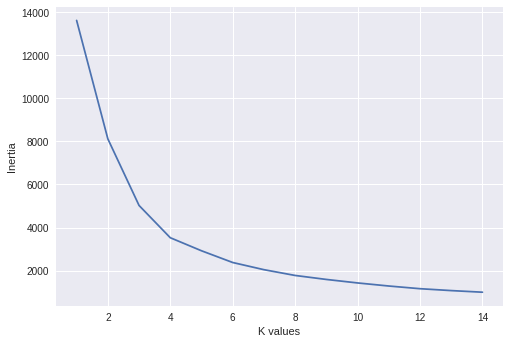

In [ ]:
error={}
for i in range(1,15):
  kmeans = KMeans(init='random', n_clusters=i, n_init=10)
  kmeans.fit(pca_data)
  # getting the squared error of the clustered points
  sqError=kmeans.inertia_
  error[i]=sqError
plt.plot(list(error.keys()),list(error.values()))
plt.xlabel("K values")
plt.ylabel("Inertia")
plt.show()

The elbow is at the point 3 , hence 3 is the optimum value of k for KMeans clustering.

# **Determining the optimal value of k (for kmeans) using Silhouette Score**

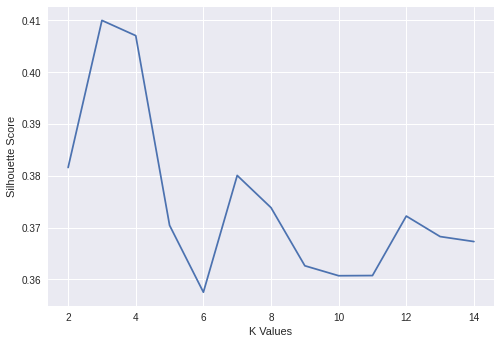

Maximum silhouette score is  0.41001516288025025  for  3


In [ ]:
from sklearn.metrics import silhouette_score 
silScores={}
maxSil=-1
ans=(-1,-1)
for i in range(2,15):
  kmeans = KMeans(init='random', n_clusters=i, n_init=2)
  kmeans.fit(pca_data)
  cluster_labels=kmeans.predict(pca_data)
  # getting the average of silehouette score of all points
  # pca_data_arr=np.array(pca_data).reshape(-1,1)
  silAvg=silhouette_score(pca_data, cluster_labels) 
  silScores[i]=silAvg
  if maxSil<silAvg :
    maxSil=silAvg
    ans=(i,maxSil)
plt.plot(list(silScores.keys()),list(silScores.values()))
plt.xlabel("K Values")
plt.ylabel("Silhouette Score")
plt.show()
print("Maximum silhouette score is ",ans[1], " for ",ans[0])

The value of k that we get from silhouette analysis is same as that we get from elbow method i.e. k=3.

# **KMEANS Clustering using optimal value of k = 3**

Coordinates of Centroids in the graph : 
[[-1.42270987 -0.08800844]
 [ 0.92960953 -0.93563493]
 [ 0.8132484   1.40836898]]


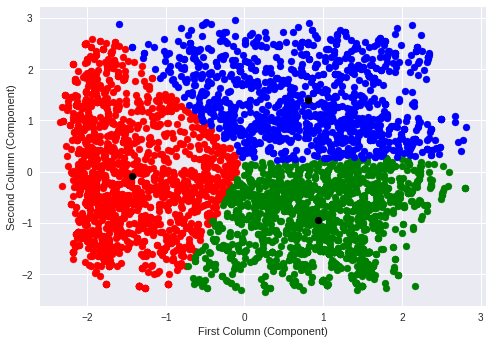

In [ ]:
# from sklearn.cluster import KMeans
# Fit K-means with Scikit
kmeans = KMeans(init='random', n_clusters=3, n_init=10)
kmeans.fit(pca_data)
# predicting the clusters
p=kmeans.predict(pca_data)
data1=pd.DataFrame(data=pca_data,columns=['a','b'])
# print(data1.head())
data1['y']=p
# print(data1.head())

X=data1.loc[:,['a','b']]
y=data1.loc[:,['y']]
x1=data1[data1['y']==0]
x2=data1[data1['y']==1]
x3=data1[data1['y']==2]


cPoints=kmeans.cluster_centers_
print("Coordinates of Centroids in the graph : ")
print(cPoints)
plt.scatter(x1.iloc[:,0],x1.iloc[:,1],color='red')
plt.scatter(x2.iloc[:,0],x2.iloc[:,1],color='green')
plt.scatter(x3.iloc[:,0],x3.iloc[:,1],color='blue')
plt.scatter(cPoints[:,0],cPoints[:,1],color='black')
plt.xlabel("First Column (Component)")
plt.ylabel("Second Column (Component)")
plt.show()

# **DBSCAN**

In [ ]:

# the number of clusters formed in dbscan changes by changing the parameters
# hence a dynamic function is needed to map each cluster with a color
# This function takes the list of labels representing the clusters and the return a dictionary
# in which each label is associated with a color.
import matplotlib
import matplotlib.cm as cm
def colorValue(ulabel):
    minp=min(ulabel)
    maxp=max(ulabel)
    norm = matplotlib.colors.Normalize(vmin=minp, vmax=maxp, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.brg)
    # for v in ulabel:
    #     print(mapper.to_rgba(v))
    colorList={}
    for i in ulabel:
        colorList[i]=mapper.to_rgba(i)
    return colorList

[0 0 0 ... 0 0 0]
<class 'numpy.ndarray'>
[-1  0  1  2  3  4  5  6  7  8  9 10]
Estimated number of clusters: 11
Estimated number of noise points: 103
count of  -1  :  103
count of  0  :  3873
count of  1  :  24
count of  2  :  8
count of  3  :  25
count of  4  :  11
count of  5  :  13
count of  6  :  13
count of  7  :  8
count of  8  :  23
count of  9  :  12
count of  10  :  7
4120
<class 'numpy.ndarray'>
          a         b
0 -1.636123  1.247717
1 -0.397388 -0.382398
2 -0.946225  2.071136
3 -0.842089 -0.872252
4  0.363407  2.492336
          a         b  y
0 -1.636123  1.247717  0
1 -0.397388 -0.382398  0
2 -0.946225  2.071136  0
3 -0.842089 -0.872252  0
4  0.363407  2.492336  1


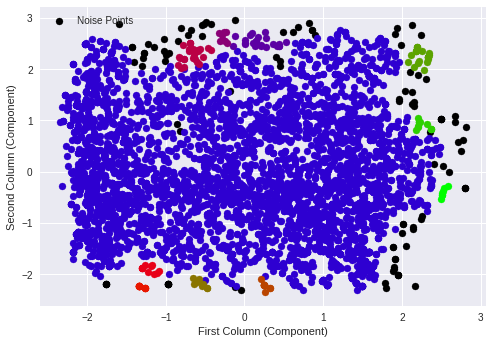

In [ ]:
from sklearn.cluster import DBSCAN
db_basic=DBSCAN(eps=0.155,min_samples=7).fit(pca_data)
labels1=db_basic.labels_
print(labels1)
print(type(labels1))
print(np.unique(labels1))
n_clusters_ = len(set(labels1)) - (1 if -1 in labels1 else 0)
n_noise_ = list(labels1).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# unique labels in the clustered data
ulabel=np.unique(labels1)
for i in ulabel:
    print("count of ",i," : ",list(labels1).count(i))
print(len(list(labels1)))
print(type(labels1))

data1=pd.DataFrame(data=pca_data,columns=['a','b'])
print(data1.head())
data1['y']=labels1
print(data1.head())
# noisePoints=data1[data1['y']==-1]
clusterPoints={}
for i in ulabel:
    clusterPoints[i]=data1[data1['y']==i]
# print(clusterPoints)

# printing the  points
# print(len(clusterPoints))
colorlist=colorValue(ulabel)

# plotting the noise points with black color differently from the other points
plt.scatter(clusterPoints[-1].iloc[:,0],clusterPoints[-1].iloc[:,1],color='black',label='Noise Points')
for i in ulabel:
    if i!=-1:
        plt.scatter(clusterPoints[i].iloc[:,0],clusterPoints[i].iloc[:,1],color=colorlist[i])
plt.legend()
plt.xlabel("First Column (Component)")
plt.ylabel("Second Column (Component)")
plt.show()

# **Determining the optimal value of eps using Silhouette Score**

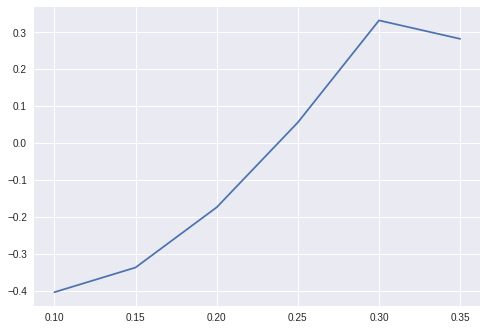

Maximum silhouette score is  0.3317273568718332  for  0.30000000000000004
[0.40000000000000013, 0.45000000000000007, 0.5000000000000001, 0.5500000000000002, 0.6000000000000002, 0.6500000000000001, 0.7000000000000002, 0.7500000000000002, 0.8000000000000002, 0.8500000000000002, 0.9000000000000002, 0.9500000000000003]


In [ ]:
# print(clusterPoints)
from sklearn.metrics import silhouette_score 
silScores={}
maxSil=-1
ans=(-1,-1)
rangeEps=np.arange(start=0.1,stop=0.99,step=0.05)
conVal=[]
for i in rangeEps:
  db_basic=DBSCAN(eps=i,min_samples=5).fit(pca_data)
  labels1=db_basic.labels_
  cluster_labels=labels1
  # getting the average of silehouette score of all points
  # pca_data_arr=np.array(pca_data).reshape(-1,1)
  if len(np.unique(cluster_labels)) <=1:
    conVal.append(i)
    continue
  silAvg=silhouette_score(pca_data, cluster_labels) 
  silScores[i]=silAvg
  if maxSil<silAvg :
    maxSil=silAvg
    ans=(i,maxSil)
plt.plot(list(silScores.keys()),list(silScores.values()))
plt.show()
print("Maximum silhouette score is ",ans[1], " for ",ans[0])
print(conVal)


# **Determining the optimal value of min_samples using Silhouette Score**

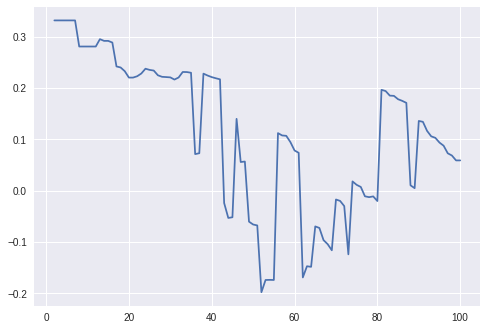

Maximum silhouette score is  0.3317273568718332  for  7
[]


In [ ]:
# print(clusterPoints)
from sklearn.metrics import silhouette_score 
silScores={}
maxSil=-1
ans=(-1,-1)
# rangeEps=np.arange(start=0.1,stop=0.99,step=0.05)
conVal=[]
for i in range(2,101,1):
  db_basic=DBSCAN(eps=0.3,min_samples=i).fit(pca_data)
  labels1=db_basic.labels_
  cluster_labels=labels1
  # getting the average of silehouette score of all points
  # pca_data_arr=np.array(pca_data).reshape(-1,1)
  if len(np.unique(cluster_labels)) <=1:
    conVal.append(i)
    continue
  silAvg=silhouette_score(pca_data, cluster_labels) 
  silScores[i]=silAvg
  if maxSil<=silAvg :
    maxSil=silAvg
    ans=(i,maxSil)
plt.plot(list(silScores.keys()),list(silScores.values()))
plt.show()
print("Maximum silhouette score is ",ans[1], " for ",ans[0])
print(conVal)

# **Now clustering using DBSCAN with optimal values**

[0 0 0 ... 0 0 0]
<class 'numpy.ndarray'>
[-1  0]
Estimated number of clusters: 1
Estimated number of noise points: 2
count of  -1  :  2
count of  0  :  4118
4120
<class 'numpy.ndarray'>
          a         b
0 -1.636123  1.247717
1 -0.397388 -0.382398
2 -0.946225  2.071136
3 -0.842089 -0.872252
4  0.363407  2.492336
          a         b  y
0 -1.636123  1.247717  0
1 -0.397388 -0.382398  0
2 -0.946225  2.071136  0
3 -0.842089 -0.872252  0
4  0.363407  2.492336  0


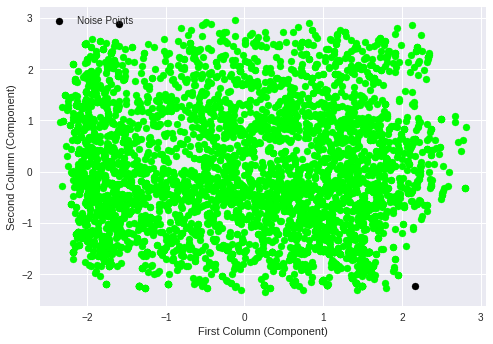

In [ ]:
from sklearn.cluster import DBSCAN
db_basic=DBSCAN(eps=0.3,min_samples=7).fit(pca_data)
labels1=db_basic.labels_
print(labels1)
print(type(labels1))
print(np.unique(labels1))
n_clusters_ = len(set(labels1)) - (1 if -1 in labels1 else 0)
n_noise_ = list(labels1).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# unique labels in the clustered data
ulabel=np.unique(labels1)
for i in ulabel:
    print("count of ",i," : ",list(labels1).count(i))
print(len(list(labels1)))
print(type(labels1))

data1=pd.DataFrame(data=pca_data,columns=['a','b'])
print(data1.head())
data1['y']=labels1
print(data1.head())
# noisePoints=data1[data1['y']==-1]
clusterPoints={}
for i in ulabel:
    clusterPoints[i]=data1[data1['y']==i]
# print(clusterPoints)

# printing the  points
# print(len(clusterPoints))
colorlist=colorValue(ulabel)

# plotting the noise points with black color differently from the other points
plt.scatter(clusterPoints[-1].iloc[:,0],clusterPoints[-1].iloc[:,1],color='black',label='Noise Points')
for i in ulabel:
    if i!=-1:
        plt.scatter(clusterPoints[i].iloc[:,0],clusterPoints[i].iloc[:,1],color=colorlist[i])
plt.legend()
plt.xlabel("First Column (Component)")
plt.ylabel("Second Column (Component)")
plt.show()

# **Creating 7 clusters as per assignment and runner function**

4120
<class 'numpy.ndarray'>
[0 1 2 3 4 5 6]
          a         b
0 -1.636123  1.247717
1 -0.397388 -0.382398
2 -0.946225  2.071136
3 -0.842089 -0.872252
4  0.363407  2.492336
          a         b  y
0 -1.636123  1.247717  3
1 -0.397388 -0.382398  0
2 -0.946225  2.071136  3
3 -0.842089 -0.872252  4
4  0.363407  2.492336  2
          a         b
0 -1.636123  1.247717
1 -0.397388 -0.382398
2 -0.946225  2.071136
3 -0.842089 -0.872252
4  0.363407  2.492336
   y
0  3
1  0
2  3
3  4
4  2
cluster  1  :  625
cluster  2  :  744
cluster  3  :  572
cluster  4  :  488
cluster  5  :  511
cluster  6  :  605
cluster  7  :  575
4120
Coordinates of Centroids in the graph : 
[[-0.01916198 -0.04673459]
 [ 0.97967406 -1.40810727]
 [ 0.97969913  1.75581697]
 [-1.34266189  1.60187809]
 [-1.22496956 -1.36267979]
 [ 1.61427774  0.09011139]
 [-1.6896399  -0.11491297]]


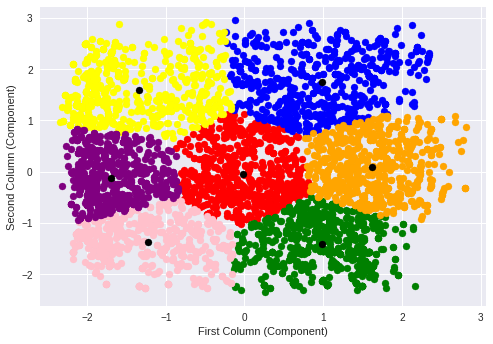

In [ ]:
# Fit K-means with Scikit
kmeans = KMeans(init='k-means++', n_clusters=7, n_init=10)
kmeans.fit(pca_data)
# predicting the clusters
p=kmeans.predict(pca_data)


print(len(p))
print(type(p))
print(np.unique(p))
data1=pd.DataFrame(data=pca_data,columns=['a','b'])
print(data1.head())
data1['y']=p
print(data1.head())
X=data1.loc[:,['a','b']]
y=data1.loc[:,['y']]
print(X.head())
print(y.head())

# plt.scatter(X.iloc[:,0],X.iloc[:,1],c=y)
# plt.show()
x1=data1[data1['y']==0]
print("cluster ",1,' : ',x1.shape[0])
x2=data1[data1['y']==1]
print("cluster ",2,' : ',x2.shape[0])
x3=data1[data1['y']==2]
print("cluster ",3,' : ',x3.shape[0])
x4=data1[data1['y']==3]
print("cluster ",4,' : ',x4.shape[0])
x5=data1[data1['y']==4]
print("cluster ",5,' : ',x5.shape[0])
x6=data1[data1['y']==5]
print("cluster ",6,' : ',x6.shape[0])
x7=data1[data1['y']==6]
print("cluster ",7,' : ',x7.shape[0])
# print(x1.head())
print(x1.shape[0]+x2.shape[0]+x3.shape[0]+x4.shape[0]+x5.shape[0]+x6.shape[0]+x7.shape[0])

cPoints12=kmeans.cluster_centers_
print("Coordinates of Centroids in the graph : ")
print(cPoints12)
plt.scatter(x1.iloc[:,0],x1.iloc[:,1],color='red')
plt.scatter(x2.iloc[:,0],x2.iloc[:,1],color='green')
plt.scatter(x3.iloc[:,0],x3.iloc[:,1],color='blue')
plt.scatter(x4.iloc[:,0],x4.iloc[:,1],color='yellow')
plt.scatter(x5.iloc[:,0],x5.iloc[:,1],color='pink')
plt.scatter(x6.iloc[:,0],x6.iloc[:,1],color='orange')
plt.scatter(x7.iloc[:,0],x7.iloc[:,1],color='purple')
plt.scatter(cPoints12[:,0],cPoints12[:,1],color='black')
plt.xlabel("First Column (Component)")
plt.ylabel("Second Column (Component)")

plt.show()

In [ ]:
def runner_function(X_test):
  # encoding the data to numeric values in each column
  #encoding the above columns
  dd = pd.read_csv(X_test)
  print(dd.head()) 
  dd['Elevation']=dd['Elevation'].astype('category')
  dd['Elevation']=dd['Elevation'].cat.codes

  dd['Aspect']=dd['Aspect'].astype('category')
  dd['Aspect']=dd['Aspect'].cat.codes

  dd['Slope']=dd['Slope'].astype('category')
  dd['Slope']=dd['Slope'].cat.codes

  dd['Wilderness']=dd['Wilderness'].astype('category')
  dd['Wilderness']=dd['Wilderness'].cat.codes

  dd['Soil_Type']=dd['Soil_Type'].astype('category')
  dd['Soil_Type']=dd['Soil_Type'].cat.codes

  dd['Hillshade_9am']=dd['Hillshade_9am'].astype('category')
  dd['Hillshade_9am']=dd['Hillshade_9am'].cat.codes

  dd['Hillshade_noon']=dd['Hillshade_noon'].astype('category')
  dd['Hillshade_noon']=dd['Hillshade_noon'].cat.codes

  dd['Horizontal_Distance_To_Fire_Points']=dd['Horizontal_Distance_To_Fire_Points'].astype('category')
  dd['Horizontal_Distance_To_Fire_Points']=dd['Horizontal_Distance_To_Fire_Points'].cat.codes

  print(dd.head())
  #Dropping the id column
  data=dd.drop('id',axis=1)
  print(data.head())
  print(data.columns)
  print(len(data.columns))
  # first scaling the features of the dataset
  sc = StandardScaler() 
  # fitting 
  sc.fit(data) 
  scaled_data = sc.transform(data)
  print(scaled_data)
  print(scaled_data.shape)

  # Let's say, components = 2 
  pca_d= PCA(n_components = 2) 
  pca_d.fit(scaled_data) 
  pca_data = pca_d.transform(scaled_data) 
    
  print(pca_data.shape)
  print(pca_data)
  # Fit K-means with Scikit
  kmeans = KMeans(init='k-means++', n_clusters=7, n_init=10)
  kmeans.fit(pca_data)
  # predicting the clusters
  pred = kmeans.predict(pca_data)
  data = pd.DataFrame()
  data['Label'] = pred
  data.to_csv('answer.csv', index=False) 
  d = pd.read_csv('answer.csv')
  print(d)


In [ ]:
if __name__ == "__main__":
  path = "X_test.csv"
  runner(path)